Lien Github vers le tutortiel : https://github.com/GitiHubi/deepAI

In [30]:
# importing utilities
import os
import sys
from datetime import datetime
import io
import urllib

# importing data science libraries
import pandas as pd
import random as rd
import numpy as np

# importing pytorch libraries
import torch
from torch import nn
from torch import autograd
from torch.utils.data import DataLoader

# import visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import Image, display
sns.set_style('darkgrid')

# ignore potential warnings
import warnings
warnings.filterwarnings("ignore")

# Nettoyage des données

In [32]:
USE_CUDA = True
# initialisé le noyeau
seed_value = 1234 
rd.seed(seed_value) 
np.random.seed(seed_value)
torch.manual_seed(seed_value) # set pytorch seed CPU
if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    torch.cuda.manual_seed(seed_value) # set pytorch seed GPU

In [33]:
# Obtenir le dataset
#url = 'https://raw.githubusercontent.com/GitiHubi/deepAI/master/data/fraud_dataset_v2.csv'
#url = 'https://github.com/Dominicduf/Projet_INF8225/Ecriture.csv'

JE_dataset = pd.read_csv('Ecriture_01.csv', sep=';', decimal=",")

In [34]:
# Visualiser la dimenstion du dataset
col_num = JE_dataset.shape[1]
row_num = JE_dataset.shape[0]

print ("Nombre de lignes : " + str(row_num))
print ("Nombre de colonnes : " + str(col_num))

Nombre de lignes : 165146
Nombre de colonnes : 9


In [35]:
# Retirer les labels
#label = ori_dataset.pop('label')

# Visualisation de la base de donnees
JE_dataset.head(10)

,BKPF_BELNR,BKPF_BUKRS,BKPF_BUZEI,BKPF_BLART,BKPF_USNAM,BKPF_WAERS,BSEG_DMBTR,BSEG_WRBTR,BSEG_HKONT
0,100000001,101,1,SA,DP85180,CAD,2.690000e+08,2.690000e+08,311000
1,100000002,101,1,SA,DP85180,CAD,2.930000e+06,2.930000e+06,399999
2,100000004,101,1,AB,DP85180,CAD,2.930000e+06,2.930000e+06,399999
3,100000009,101,1,SA,AL85560,CAD,9.329210e+03,9.329210e+03,200201
4,100000010,101,1,AB,BC86312,USD,8.660800e+02,0.000000e+00,765010
5,100000013,101,1,SA,DP85180,CAD,4.725507e+07,4.725507e+07,182540
6,100000014,101,1,SA,DP85180,CAD,1.371250e+07,1.371250e+07,471000
7,100000015,101,1,SA,DP85180,CAD,2.800000e+07,2.800000e+07,128201
8,100000016,101,1,SA,DP85180,CAD,8.590910e+06,8.590910e+06,760065
9,100000017,101,1,SA,DP85180,CAD,1.357722e+07,1.357722e+07,762000


In [36]:
# Convertir le colonne BSEG_HKONT en string puisqu'elle est catégorique (numéro de compte)
JE_dataset = JE_dataset.astype({'BSEG_HKONT':str,'BKPF_BUKRS':str})


# Sélection des attributs catégoriques
# BELNR est un identifiant unique pour chaque écriture de journal
categorical_attr_names = ['BKPF_BLART', 'BKPF_USNAM', 'BKPF_WAERS', 'BSEG_HKONT','BKPF_BUKRS']

# one-hot encoding sur les variables catégoriques
JE_dataset_categ_transformed = pd.get_dummies(JE_dataset[categorical_attr_names])

JE_dataset_categ_transformed.head(10)

,BKPF_BLART_AA,BKPF_BLART_AB,BKPF_BLART_AF,BKPF_BLART_DA,BKPF_BLART_DG,BKPF_BLART_DR,BKPF_BLART_DZ,BKPF_BLART_KA,BKPF_BLART_KG,BKPF_BLART_KR,...,BKPF_BUKRS_804,BKPF_BUKRS_901,BKPF_BUKRS_903,BKPF_BUKRS_905,BKPF_BUKRS_907,BKPF_BUKRS_910,BKPF_BUKRS_911,BKPF_BUKRS_912,BKPF_BUKRS_915,BKPF_BUKRS_916
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# sélection des attributs numériques
numeric_attr_names = ['BSEG_DMBTR', 'BSEG_WRBTR']

# élimination du zéro et applicaiton du l'échelle logarithmique
numeric_attr = JE_dataset[numeric_attr_names] + 1e-7
numeric_attr = numeric_attr.apply(np.log)

# normalisation entre 0 et 1
JE_dataset_numeric_attr = (numeric_attr - numeric_attr.min()) / (numeric_attr.max() - numeric_attr.min())

In [38]:
# mettre ensemble les attributs catégoriques et numériques
JE_subset_transformed = pd.concat([JE_dataset_categ_transformed, JE_dataset_numeric_attr], axis = 1)

# Visualisation des dimensions de la base de données complète
JE_subset_transformed.shape

(165146, 1025)

# Autoencodeur

## Initialisation du réseau

### Encoder - Decoder 1 : 1007 - 3 - 1007

In [9]:
# Encodeur 1 
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 3
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=3, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.encoder_L1(x))
        return x

In [10]:
# Décodeur 1
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # Couche 1 - in 3, out 1007
        self.decoder_L1 = nn.Linear(in_features=3, out_features=1025, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.decoder_L1(x))
        
        return x

### Encodeur - Decodeur 2 : 1007- 4 - 3 - 4 - 1007

In [19]:
# Encodeur 2
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 3
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # Couche 2 - in 4, out 3
        self.encoder_L2 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.encoder_L2(x))
        return x

In [20]:
# Décodeur 2
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # Couche 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 2 - in 4, out 1007
        self.decoder_L2 = nn.Linear(in_features=4, out_features=1025, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L2.weight)  # init weights according to [9]
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.decoder_L2(x))
        
        return x

### Encodeur-Decodeur 3 : 1007- 8 - 4 - 3 - 4 - 8 - 1007

In [29]:
# Encodeur 3
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 8
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # Couche 2 - in 8, out 4
        self.encoder_L2 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 3 - in 4, out 3
        self.encoder_L3 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)        
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.encoder_L3(x))
        return x

In [30]:
# Décodeur 3
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # Couche 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(in_features=4, out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L2.weight)  # init weights according to [9]
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 3 - in 8, out 1007
        self.decoder_L3 = nn.Linear(in_features=8, out_features=1025, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L3.weight)  # init weights according to [9]
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.decoder_L3(x))
        
        return x

### Encodeur - Decodeur 4 : 1007- 16 - 8 - 4 - 3 - 4 - 8 - 16 - 1007

In [39]:
# Encodeur 4
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 16
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=16, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # Couche 2 - in 16, out 8
        self.encoder_L2 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 3 - in 8, out 4
        self.encoder_L3 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 4 - in 4, out 3
        self.encoder_L4 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)  
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.encoder_L4(x))
        
        return x

In [40]:
# Décodeur 4
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # Couche 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(in_features=4, out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L2.weight)  # init weights according to [9]
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(in_features=8, out_features=16, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L3.weight)  # init weights according to [9]
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 4 - in 16, out 1007
        self.decoder_L4 = nn.Linear(in_features=16, out_features=1025, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L4.weight)  # init weights according to [9]
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.decoder_L4(x))
        
        return x

### Encodeur - Decodeur 5 : 1007- 32 -16 - 8 - 4 - 3 - 4 - 8 - 16 - 32 - 1007

In [49]:
# Encodeur 5
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 32
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=32, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # Couche 2 - in 32, out 16
        self.encoder_L2 = nn.Linear(32, 16, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 3 - in 16, out 8
        self.encoder_L3 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 4 - in 8, out 4
        self.encoder_L4 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 5 - in 4, out 3
        self.encoder_L5 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L5.weight)
        self.encoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)  
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.dropout(self.encoder_L4(x)))
        x = self.encoder_R5(self.encoder_L5(x))
        
        return x

In [50]:
# Décodeur 5
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # Couche 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(in_features=4, out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L2.weight)  # init weights according to [9]
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(in_features=8, out_features=16, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L3.weight)  # init weights according to [9]
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 4 - in 16, out 32
        self.decoder_L4 = nn.Linear(in_features=16, out_features=32, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L4.weight)  # init weights according to [9]
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 5 - in 32, out 1007
        self.decoder_L5 = nn.Linear(in_features=32, out_features=1025, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L5.weight)  # init weights according to [9]
        self.decoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.dropout(self.decoder_L4(x)))
        x = self.decoder_R5(self.decoder_L5(x))
        
        return x

###  Encodeur - Decodeur 6 : 1007- 64 - 32 -16 - 8 - 4 - 3 - 4 - 8 - 16 - 32 - 64 - 1007

In [59]:
# Encodeur 6
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 64
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=64, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # Couche 2 - in 64, out 32
        self.encoder_L2 = nn.Linear(64, 32, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 3 - in 32, out 16
        self.encoder_L3 = nn.Linear(32, 16, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 4 - in 16, out 8
        self.encoder_L4 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 5 - in 8, out 4
        self.encoder_L5 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L5.weight)
        self.encoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 6 - in 4, out 3
        self.encoder_L6 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L6.weight)
        self.encoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.dropout(self.encoder_L4(x)))
        x = self.encoder_R5(self.dropout(self.encoder_L5(x)))
        x = self.encoder_R6(self.encoder_L6(x))
        
        return x

In [60]:
# Décodeur 6
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # Couche 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(in_features=4, out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L2.weight)  # init weights according to [9]
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(in_features=8, out_features=16, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L3.weight)  # init weights according to [9]
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 4 - in 16, out 32
        self.decoder_L4 = nn.Linear(in_features=16, out_features=32, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L4.weight)  # init weights according to [9]
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 5 - in 32, out 64
        self.decoder_L5 = nn.Linear(in_features=32, out_features=64, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L5.weight)  # init weights according to [9]
        self.decoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 6 - in 64, out 1007
        self.decoder_L6 = nn.Linear(in_features=64, out_features=1025, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L6.weight)  # init weights according to [9]
        self.decoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
   
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.dropout(self.decoder_L4(x)))
        x = self.decoder_R5(self.dropout(self.decoder_L5(x)))
        x = self.decoder_R6(self.decoder_L6(x))
        
        return x

### Encodeur - Decodeur 7 : 1007- 128 - 64 - 32 -16 - 8 - 4 - 3 - 4 - 8 - 16 - 32 - 64 - 128 - 1007

In [69]:
# Encodeur 7
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 128
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=128, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # Couche 2 - in 128, out 64
        self.encoder_L2 = nn.Linear(128, 64, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 3 - in 64, out 32
        self.encoder_L3 = nn.Linear(64, 32, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 4 - in 32, out 16
        self.encoder_L4 = nn.Linear(32, 16, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 5 - in 16, out 8
        self.encoder_L5 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L5.weight)
        self.encoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 6 - in 8, out 4
        self.encoder_L6 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L6.weight)
        self.encoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 7 - in 4, out 3
        self.encoder_L7 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L7.weight)
        self.encoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.dropout(self.encoder_L4(x)))
        x = self.encoder_R5(self.dropout(self.encoder_L5(x)))
        x = self.encoder_R6(self.dropout(self.encoder_L6(x)))
        x = self.encoder_R7(self.encoder_L7(x))
        
        return x

In [70]:
# Décodeur 7
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # Couche 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(in_features=4, out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L2.weight)  # init weights according to [9]
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(in_features=8, out_features=16, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L3.weight)  # init weights according to [9]
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 4 - in 16, out 32
        self.decoder_L4 = nn.Linear(in_features=16, out_features=32, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L4.weight)  # init weights according to [9]
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 5 - in 32, out 64
        self.decoder_L5 = nn.Linear(in_features=32, out_features=64, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L5.weight)  # init weights according to [9]
        self.decoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 6 - in 64, out 128
        self.decoder_L6 = nn.Linear(in_features=64, out_features=128, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L6.weight)  # init weights according to [9]
        self.decoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 7 - in 128, out 1007
        self.decoder_L7 = nn.Linear(in_features=128, out_features=1025, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L7.weight)  # init weights according to [9]
        self.decoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
   
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.dropout(self.decoder_L4(x)))
        x = self.decoder_R5(self.dropout(self.decoder_L5(x)))
        x = self.decoder_R6(self.dropout(self.decoder_L6(x)))
        x = self.decoder_R7(self.decoder_L7(x))
        
        return x

### Encodeur - Decodeur 8 : 1007- 256 - 128 - 64 - 32 -16 - 8 - 4 - 3 - 4 - 8 - 16 - 32 - 64 - 128 - 256 - 1007 

In [79]:
# Encodeur 8
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 256
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=256, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # Couche 2 - in 256, out 128
        self.encoder_L2 = nn.Linear(256, 128, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 3 - in 128, out 64
        self.encoder_L3 = nn.Linear(128, 64, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 4 - in 64, out 32
        self.encoder_L4 = nn.Linear(64, 32, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 5 - in 32, out 16
        self.encoder_L5 = nn.Linear(32, 16, bias=True)
        nn.init.xavier_uniform_(self.encoder_L5.weight)
        self.encoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 6 - in 16, out 8
        self.encoder_L6 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L6.weight)
        self.encoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 7 - in 8, out 4
        self.encoder_L7 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L7.weight)
        self.encoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 8 - in 4, out 3
        self.encoder_L8 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L8.weight)
        self.encoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.dropout(self.encoder_L4(x)))
        x = self.encoder_R5(self.dropout(self.encoder_L5(x)))
        x = self.encoder_R6(self.dropout(self.encoder_L6(x)))
        x = self.encoder_R7(self.dropout(self.encoder_L7(x)))
        x = self.encoder_R8(self.encoder_L8(x))
        
        return x

In [80]:
# Décodeur 8
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # Couche 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(in_features=4, out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L2.weight)  # init weights according to [9]
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(in_features=8, out_features=16, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L3.weight)  # init weights according to [9]
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 4 - in 16, out 32
        self.decoder_L4 = nn.Linear(in_features=16, out_features=32, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L4.weight)  # init weights according to [9]
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 5 - in 32, out 64
        self.decoder_L5 = nn.Linear(in_features=32, out_features=64, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L5.weight)  # init weights according to [9]
        self.decoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 6 - in 64, out 128
        self.decoder_L6 = nn.Linear(in_features=64, out_features=128, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L6.weight)  # init weights according to [9]
        self.decoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 7 - in 128, out 256
        self.decoder_L7 = nn.Linear(in_features=128, out_features=256, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L7.weight)  # init weights according to [9]
        self.decoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 8 - in 256, out 1007
        self.decoder_L8 = nn.Linear(in_features=256, out_features=1025, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L8.weight)  # init weights according to [9]
        self.decoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
   
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.dropout(self.decoder_L4(x)))
        x = self.decoder_R5(self.dropout(self.decoder_L5(x)))
        x = self.decoder_R6(self.dropout(self.decoder_L6(x)))
        x = self.decoder_R7(self.dropout(self.decoder_L7(x)))
        x = self.decoder_R8(self.decoder_L8(x))
        
        return x

### Encodeur - Decodeur 9 : 1007- 512 - 256 - 128 - 64 - 32 -16 - 8 - 4 - 3 - 4 - 8 - 16 - 32 - 64 - 128 - 256 - 512 - 1007

In [39]:
# Encodeur 9
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 512
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=512, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # Couche 2 - in 512, out 256
        self.encoder_L2 = nn.Linear(512, 256, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # Couche 3 - in 256, out 128
        self.encoder_L3 = nn.Linear(256, 128, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # Couche 4 - in 128, out 64
        self.encoder_L4 = nn.Linear(128, 64, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # couche 5 - in 64, out 32
        self.encoder_L5 = nn.Linear(64, 32, bias=True)
        nn.init.xavier_uniform_(self.encoder_L5.weight)
        self.encoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # couche 6 - in 32, out 16
        self.encoder_L6 = nn.Linear(32, 16, bias=True)
        nn.init.xavier_uniform_(self.encoder_L6.weight)
        self.encoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # couche 7 - in 16, out 8
        self.encoder_L7 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L7.weight)
        self.encoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # couche 8 - in 8, out 4
        self.encoder_L8 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L8.weight)
        self.encoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # couche 9 - in 4, out 3
        self.encoder_L9 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L9.weight)
        self.encoder_R9 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.dropout(self.encoder_L4(x)))
        x = self.encoder_R5(self.dropout(self.encoder_L5(x)))
        x = self.encoder_R6(self.dropout(self.encoder_L6(x)))
        x = self.encoder_R7(self.dropout(self.encoder_L7(x)))
        x = self.encoder_R8(self.dropout(self.encoder_L8(x)))
        x = self.encoder_R9(self.encoder_L9(x)) # don't apply dropout to the AE bottleneck

        return x

In [40]:
# Décodeur 9
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # specify layer 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # specify layer 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(4, 8, bias=True)
        nn.init.xavier_uniform_(self.decoder_L2.weight)
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(8, 16, bias=True)
        nn.init.xavier_uniform_(self.decoder_L3.weight)
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 4 - in 16, out 32
        self.decoder_L4 = nn.Linear(16, 32, bias=True)
        nn.init.xavier_uniform_(self.decoder_L4.weight)
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 5 - in 32, out 64
        self.decoder_L5 = nn.Linear(32, 64, bias=True)
        nn.init.xavier_uniform_(self.decoder_L5.weight)
        self.decoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 6 - in 64, out 128
        self.decoder_L6 = nn.Linear(64, 128, bias=True)
        nn.init.xavier_uniform_(self.decoder_L6.weight)
        self.decoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # specify layer 7 - in 128, out 256
        self.decoder_L7 = nn.Linear(128, 256, bias=True)
        nn.init.xavier_uniform_(self.decoder_L7.weight)
        self.decoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 8 - in 256, out 512
        self.decoder_L8 = nn.Linear(256, 512, bias=True)
        nn.init.xavier_uniform_(self.decoder_L8.weight)
        self.decoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 9 - in 512, out 618
        self.decoder_L9 = nn.Linear(in_features=512, out_features=JE_subset_transformed.shape[1], bias=True)
        nn.init.xavier_uniform_(self.decoder_L9.weight)
        self.decoder_R9 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.dropout(self.decoder_L4(x)))
        x = self.decoder_R5(self.dropout(self.decoder_L5(x)))
        x = self.decoder_R6(self.dropout(self.decoder_L6(x)))
        x = self.decoder_R7(self.dropout(self.decoder_L7(x)))
        x = self.decoder_R8(self.dropout(self.decoder_L8(x)))
        x = self.decoder_R9(self.decoder_L9(x)) # don't apply dropout to the AE output
        
        return x

### Initialisation du réseau

In [47]:
# initalisation de l'architecture de l'encodeur
encoder_train = encoder()

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    encoder_train = encoder().cuda()
    
print('encoder architecture:\n\n{}\n'.format(encoder_train))

encoder architecture:

encoder(
  (encoder_L1): Linear(in_features=1025, out_features=512, bias=True)
  (encoder_R1): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L2): Linear(in_features=512, out_features=256, bias=True)
  (encoder_R2): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L3): Linear(in_features=256, out_features=128, bias=True)
  (encoder_R3): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L4): Linear(in_features=128, out_features=64, bias=True)
  (encoder_R4): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L5): Linear(in_features=64, out_features=32, bias=True)
  (encoder_R5): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L6): Linear(in_features=32, out_features=16, bias=True)
  (encoder_R6): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L7): Linear(in_features=16, out_features=8, bias=True)
  (encoder_R7): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L8): Linear(in_features=8, out_features=4, bias=True)
  (enco

In [48]:
# initialisation de l'architecture du décodeur
decoder_train = decoder()

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    decoder_train = decoder().cuda()
    
# print the initialized architectures
print('decodeur architecture:\n\n{}\n'.format(decoder_train))

decodeur architecture:

decoder(
  (decoder_L1): Linear(in_features=3, out_features=4, bias=True)
  (decoder_R1): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L2): Linear(in_features=4, out_features=8, bias=True)
  (decoder_R2): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L3): Linear(in_features=8, out_features=16, bias=True)
  (decoder_R3): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L4): Linear(in_features=16, out_features=32, bias=True)
  (decoder_R4): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L5): Linear(in_features=32, out_features=64, bias=True)
  (decoder_R5): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L6): Linear(in_features=64, out_features=128, bias=True)
  (decoder_R6): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L7): Linear(in_features=128, out_features=256, bias=True)
  (decoder_R7): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L8): Linear(in_features=256, out_features=512, bias=True)
  (decoder_

## Entraînement du réseau

In [49]:
# fonction de perte
loss_function = nn.BCEWithLogitsLoss(reduction='mean')

# Pas d'entrainement et optimisation
learning_rate = 1e-3
encoder_optimizer = torch.optim.Adam(encoder_train.parameters(), lr=learning_rate)
decoder_optimizer = torch.optim.Adam(decoder_train.parameters(), lr=learning_rate)

In [50]:
# Initialisation d'hyperparamètre
num_epochs = 20
mini_batch_size = 64

In [51]:
# conversion du dataset en tensor pytorch
torch_dataset = torch.from_numpy(JE_subset_transformed.values).float()

dataloader = DataLoader(torch_dataset, batch_size=mini_batch_size, shuffle=True, num_workers=1)

if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    dataloader = DataLoader(torch_dataset.cuda(), batch_size=mini_batch_size, shuffle=True)

In [52]:
# initialisation de la perte
epoch_losses = []

# conversion du tensor en variable torch
data = autograd.Variable(torch_dataset)

# entraînement du model
for epoch in range(num_epochs):

    # initialisation de la perte par mini-batch
    mini_batch_losses = []
    
    # initialisation du compteur par mini-batch
    mini_batch_count = 0
    
    # determine if CUDA is available at compute node
    if(torch.backends.cudnn.version() != None) and (USE_CUDA == True):
        
        # set networks / models in GPU mode
        encoder_train.cuda()
        decoder_train.cuda()

    # set networks in training mode (apply dropout when needed)
    encoder_train.train()
    decoder_train.train()

    # start timer
    start_time = datetime.now()
        
    # itération pour chaque mini batch
    for mini_batch_data in dataloader:

        # augmentation du compteur
        mini_batch_count += 1

        # conversion de chaque mini batch en variable torch
        mini_batch_torch = autograd.Variable(mini_batch_data)

        # =================== (1) forward pass ===================================

        z_representation = encoder_train(mini_batch_torch) # encodeur
        mini_batch_reconstruction = decoder_train(z_representation) # decodeur
        
        # =================== (2) compute reconstruction loss ====================

        reconstruction_loss = loss_function(mini_batch_reconstruction, mini_batch_torch)
        
        # =================== (3) backward pass ==================================

        # reset graph gradients
        decoder_optimizer.zero_grad()
        encoder_optimizer.zero_grad()

        # run backward pass
        reconstruction_loss.backward()
        
        # =================== (4) update model parameters ========================

        # update network parameters
        decoder_optimizer.step()
        encoder_optimizer.step()

        # =================== monitor training progress ==========================

        # print a chaque 1000 batches
        if mini_batch_count % 1000 == 0:
            
            # print the training mode: either on GPU or CPU
            mode = 'GPU' if (torch.backends.cudnn.version() != None) and (USE_CUDA == True) else 'CPU'
            
            # print mini batch reconstuction results
            now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
            end_time = datetime.now() - start_time
            print('[LOG {}] training status, epoch: [{:04}/{:04}], batch: {:04}, loss: {}, mode: {}, time required: {}'.format(now, (epoch+1), num_epochs, mini_batch_count, np.round(reconstruction_loss.item(), 4), mode, end_time))

            # reset timer
            start_time = datetime.now()
            
        # collect mini-batch loss
        mini_batch_losses.extend([np.round(reconstruction_loss.item(), 4)])

    # =================== evaluate model performance =============================
                                 
    # collect mean training epoch loss
    epoch_losses.extend([np.mean(mini_batch_losses)])
    
    # print training epoch results
    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] training status, epoch: [{:04}/{:04}], loss: {:.10f}'.format(now, (epoch+1), num_epochs, np.mean(mini_batch_losses)))


[LOG 20200426-16:51:56] training status, epoch: [0001/0020], batch: 1000, loss: 0.0061, mode: GPU, time required: 0:00:35.655889
[LOG 20200426-16:52:31] training status, epoch: [0001/0020], batch: 2000, loss: 0.0035, mode: GPU, time required: 0:00:35.655655
[LOG 20200426-16:52:52] training status, epoch: [0001/0020], loss: 0.0091730337
[LOG 20200426-16:53:28] training status, epoch: [0002/0020], batch: 1000, loss: 0.0032, mode: GPU, time required: 0:00:35.427917
[LOG 20200426-16:54:03] training status, epoch: [0002/0020], batch: 2000, loss: 0.003, mode: GPU, time required: 0:00:35.508120
[LOG 20200426-16:54:24] training status, epoch: [0002/0020], loss: 0.0033523441
[LOG 20200426-16:54:59] training status, epoch: [0003/0020], batch: 1000, loss: 0.0031, mode: GPU, time required: 0:00:35.492048
[LOG 20200426-16:55:35] training status, epoch: [0003/0020], batch: 2000, loss: 0.0026, mode: GPU, time required: 0:00:35.870162
[LOG 20200426-16:55:56] training status, epoch: [0003/0020], loss: 

Text(0.5, 1.0, 'AENN training performance')

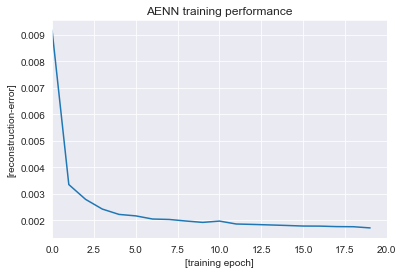

In [53]:
# plot the training progress
plt.plot(range(0, len(epoch_losses)), epoch_losses)
plt.xlabel('[training epoch]')
plt.xlim([0, len(epoch_losses)])
plt.ylabel('[reconstruction-error]')
#plt.ylim([0.0, 1.0])
plt.title('AENN training performance')

In [54]:
print(epoch_losses)

[0.00917303370786517, 0.003352344052692755, 0.0027948857032158076, 0.002428516079039132, 0.002226656334753971, 0.0021712514529252224, 0.002052963967454475, 0.002036148779542813, 0.001977101898488958, 0.001925416505230531, 0.0019746609841146843, 0.0018649748159628048, 0.0018488957768306859, 0.0018297171638899652, 0.0018100736148779543, 0.0017877179387834172, 0.0017850833010461063, 0.0017667958155753586, 0.001762262688880279, 0.0017172801239829522]


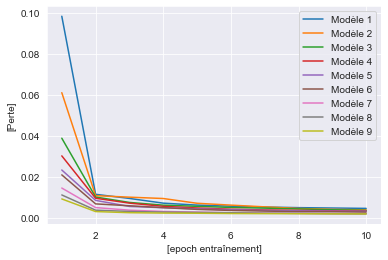

In [101]:
# Figure des différents types d'achitectures
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mod_1 = [0.09845629600929873, 0.011499767531964356, 0.009490120108485083, 0.007181518791166215, 0.006238434715226656, 0.005694924447888415, 0.005287756683456025, 0.004994614490507555, 0.004799496319256102, 0.004624254165052306]
mod_2 = [0.06113316543975203, 0.010848934521503293, 0.0101046493607129, 0.009450949244478885, 0.0071233242929097254, 0.006222355676094537, 0.005374041069352964, 0.00458767919411081, 0.004152886478109259, 0.0039046106160402945]
mod_3 = [0.038893723363037584, 0.010170825261526541, 0.007535218907400232, 0.0062030995738086014, 0.005632545524990314, 0.005099225106547849, 0.004750251840371949, 0.0043748547074777214, 0.003955986051917861, 0.0036591631150716783]
mod_4 = [0.030274002324680353, 0.009578496706702827, 0.0071980240216970165, 0.005641766757070903, 0.004832351801627276, 0.0042198372723750485, 0.0038746609841146845, 0.0036726462611390938, 0.0034710189848895776, 0.003331228206121658]
mod_5 = [0.023370670282836112, 0.008540798140255716, 0.0055726850058117, 0.004963851220457187, 0.004420224719101124, 0.003976791941108097, 0.0036493219682293687, 0.003419914761720263, 0.003292909724912824, 0.0032347539713289426]
mod_6 = [0.020992909724912825, 0.006825842696629213, 0.0059075164664858576, 0.004993103448275862, 0.004142696629213483, 0.0036177063153816345, 0.0033022471910112362, 0.0030504068190623785, 0.002997752808988764, 0.002810034870205347]
mod_7 = [0.014565594730724525, 0.005023789228981015, 0.0037535838822161946, 0.0031344827586206893, 0.002822433165439752, 0.002485354513754359, 0.002302285935683843, 0.0021994575745834946, 0.0021153428903525765, 0.0020353738860906623]
mod_8 = [0.011192406044168926, 0.0037550174351026738, 0.00313479271600155, 0.002825920185974428, 0.0026561022859356836, 0.002503603254552499, 0.002277334366524603, 0.0022269662921348314, 0.0020736148779542814, 0.002001356063541263]
mod_9 = [0.009240449438202248, 0.0030780705153041457, 0.002525997675319644, 0.0023350639287098023, 0.0022597055404881827, 0.002126385122045719, 0.002060092987214258, 0.0020043394033320418, 0.001952189074002325, 0.001927973653622627]
plt.plot(x, mod_1, label='Modèle 1')
plt.plot(x, mod_2, label='Modèle 2')
plt.plot(x, mod_3, label='Modèle 3')
plt.plot(x, mod_4, label='Modèle 4')
plt.plot(x, mod_5, label='Modèle 5')
plt.plot(x, mod_6, label='Modèle 6')
plt.plot(x, mod_7, label='Modèle 7')
plt.plot(x, mod_8, label='Modèle 8')
plt.plot(x, mod_9, label='Modèle 9')
plt.xlabel('[epoch entraînement]')
plt.ylabel('[Perte]')
plt.legend(loc="upper right")
plt.show()


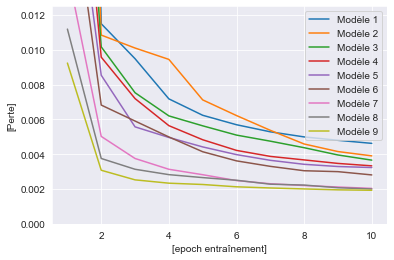

In [102]:
# Figure des différents types d'achitectures avec un zoom sur l'axe des Y
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mod_1 = [0.09845629600929873, 0.011499767531964356, 0.009490120108485083, 0.007181518791166215, 0.006238434715226656, 0.005694924447888415, 0.005287756683456025, 0.004994614490507555, 0.004799496319256102, 0.004624254165052306]
mod_2 = [0.06113316543975203, 0.010848934521503293, 0.0101046493607129, 0.009450949244478885, 0.0071233242929097254, 0.006222355676094537, 0.005374041069352964, 0.00458767919411081, 0.004152886478109259, 0.0039046106160402945]
mod_3 = [0.038893723363037584, 0.010170825261526541, 0.007535218907400232, 0.0062030995738086014, 0.005632545524990314, 0.005099225106547849, 0.004750251840371949, 0.0043748547074777214, 0.003955986051917861, 0.0036591631150716783]
mod_4 = [0.030274002324680353, 0.009578496706702827, 0.0071980240216970165, 0.005641766757070903, 0.004832351801627276, 0.0042198372723750485, 0.0038746609841146845, 0.0036726462611390938, 0.0034710189848895776, 0.003331228206121658]
mod_5 = [0.023370670282836112, 0.008540798140255716, 0.0055726850058117, 0.004963851220457187, 0.004420224719101124, 0.003976791941108097, 0.0036493219682293687, 0.003419914761720263, 0.003292909724912824, 0.0032347539713289426]
mod_6 = [0.020992909724912825, 0.006825842696629213, 0.0059075164664858576, 0.004993103448275862, 0.004142696629213483, 0.0036177063153816345, 0.0033022471910112362, 0.0030504068190623785, 0.002997752808988764, 0.002810034870205347]
mod_7 = [0.014565594730724525, 0.005023789228981015, 0.0037535838822161946, 0.0031344827586206893, 0.002822433165439752, 0.002485354513754359, 0.002302285935683843, 0.0021994575745834946, 0.0021153428903525765, 0.0020353738860906623]
mod_8 = [0.011192406044168926, 0.0037550174351026738, 0.00313479271600155, 0.002825920185974428, 0.0026561022859356836, 0.002503603254552499, 0.002277334366524603, 0.0022269662921348314, 0.0020736148779542814, 0.002001356063541263]
mod_9 = [0.009240449438202248, 0.0030780705153041457, 0.002525997675319644, 0.0023350639287098023, 0.0022597055404881827, 0.002126385122045719, 0.002060092987214258, 0.0020043394033320418, 0.001952189074002325, 0.001927973653622627]
plt.plot(x, mod_1, label='Modèle 1')
plt.plot(x, mod_2, label='Modèle 2')
plt.plot(x, mod_3, label='Modèle 3')
plt.plot(x, mod_4, label='Modèle 4')
plt.plot(x, mod_5, label='Modèle 5')
plt.plot(x, mod_6, label='Modèle 6')
plt.plot(x, mod_7, label='Modèle 7')
plt.plot(x, mod_8, label='Modèle 8')
plt.plot(x, mod_9, label='Modèle 9')
plt.xlabel('[epoch entraînement]')
plt.ylabel('[Perte]')
plt.ylim([0.0, 0.0125])
plt.legend(loc="upper right")
plt.show()

In [27]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
lr_0001 = [0.02714002324680356, 0.0057984502130957, 0.004676520728399845, 0.004106896551724137, 0.0036857807051530415, 0.003426772568771794, 0.0032203796977915535, 0.003147500968616815, 0.003025532739248353, 0.002923789228981015]
lr_001  = [0.01006834560247966, 0.0037472297559085627, 0.0028310732274312283, 0.0025306082913599376, 0.002332429290972491, 0.002195350639287098, 0.00211154591243704, 0.002047772181325068, 0.0020003487020534678, 0.0019561410306082913]
lr_01 = [0.008975707090275089, 135504.26970503686, 505.90292739248355, 73.44749612553274, 206.74478190623788, 30.321390391321195, 105811.17516958543, 666.4220333979077, 565.4828094537002, 14.294009879891515]

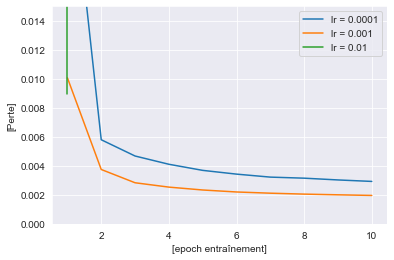

In [29]:
plt.plot(x, lr_0001, label='lr = 0.0001')
plt.plot(x, lr_001, label='lr = 0.001')
plt.plot(x, lr_01, label='lr = 0.01')
plt.xlabel('[epoch entraînement]')
plt.ylabel('[Perte]')
plt.ylim([0.0, 0.015])
plt.legend(loc="upper right")
plt.show()

In [55]:
# initalisation du réseau entraîné
encoder_eval = encoder()
decoder_eval = decoder()
# conversion du data set en variable torch
data = autograd.Variable(torch_dataset)

# mettre le réseau en mode évaluation
encoder_eval.eval()
decoder_eval.eval()

# reconstruire les écritures
reconstruction = decoder_eval(encoder_eval(data))

In [56]:
# calcule du l'erreur de reconstruction
reconstruction_loss_transaction = np.zeros(reconstruction.size()[0])

for i in range(0, reconstruction.size()[0]):

    # determine reconstruction loss - individual transactions
    reconstruction_loss_transaction[i] = loss_function(reconstruction[i], data[i]).item()

    if(i % 100000 == 0):

        ### print conversion summary
        now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
        print('[LOG {}] collected individual reconstruction loss of: {:06}/{:06} transactions'.format(now, i, reconstruction.size()[0]))

[LOG 20200426-17:28:24] collected individual reconstruction loss of: 000000/165146 transactions
[LOG 20200426-17:28:33] collected individual reconstruction loss of: 100000/165146 transactions


In [57]:
# Normalisation de l'erreur de reconstruction
reconstruction_loss_norm = (reconstruction_loss_transaction - min(reconstruction_loss_transaction))/(max(reconstruction_loss_transaction) - min(reconstruction_loss_transaction))

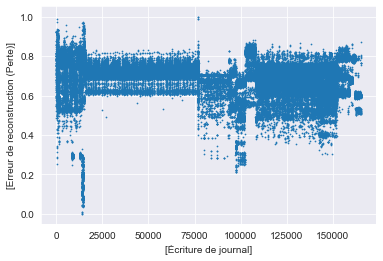

In [58]:
# 
x = range(0,len(reconstruction_loss_norm))
plt.scatter(x, reconstruction_loss_norm, s=0.5)
plt.xlabel('[Écriture de journal]')
plt.ylabel('[Erreur de reconstruction (Perte)]')
plt.show()
